In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#HR Analytics Case Study

##Importing and getting basic idea of data

In [4]:
df=pd.read_csv('people.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['workAccident'].value_counts()       #to confirm that a column has only 2 values i.e. 0 and 1

0    12830
1     2169
Name: workAccident, dtype: int64

##Cleaning the data
Cleaning data involves solving following problems:

**1.   Removing null values**


In [9]:
df.isnull().sum()       #0 indicates no null values in dataset


satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

If null values are present in dataset, you can either:




*   Drop the null values  
        df.dropna(inplace=True)         
        Drops all null values(entire row) from entire dataset

        Suitable if there are less null values(5% to 10%)
              
*   Replace the null values
        df.fillna(df[numerical_col].mean())
        If column is numerical then replace by Mean/Median

        df.fillna(df[object_col].mode()[0])
        If column is object then replace by Mode. Need to give index for mode

        Suitable if there are more null values (>10%)


**2.   Removing Duplicate values**



In [13]:
df.duplicated()
df.duplicated().value_counts()      #gives total count of true and false. true are duplicate row
df.duplicated().sum()               #gives total count of duplicate row

3008

In [14]:
df[df.duplicated()]                 #this gives the rows which have their duplicates in original dataset

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [15]:
df.drop_duplicates(inplace=True)        #inplace true commits and saves permanently

In [16]:
df.duplicated().sum()       #check again to confirm if duplicates removed

0

##Checking the correlation

*   0 - No correlation
*   0 to 0.4 - Low correlation
*   0.4 to 0.7 - Moderate correlation
*   0.7 to 1 - High correlation

Similar for values below 0, just negative






In [17]:
df.corr     #check inter-relationship between columns

<bound method DataFrame.corr of        satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0                   0.38            0.53                 2              157   
1                   0.80            0.86                 5              262   
2                   0.11            0.88                 7              272   
3                   0.37            0.52                 2              159   
4                   0.41            0.50                 2              153   
...                  ...             ...               ...              ...   
14992               0.30            0.88                 5              245   
14995               0.99            0.83                 4              274   
14996               0.72            0.72                 4              175   
14997               0.24            0.91                 5              177   
14998               0.77            0.83                 6              271   

       timeSpent.co

<ipython-input-29-965994d210d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Reds')   #cmap sets columns


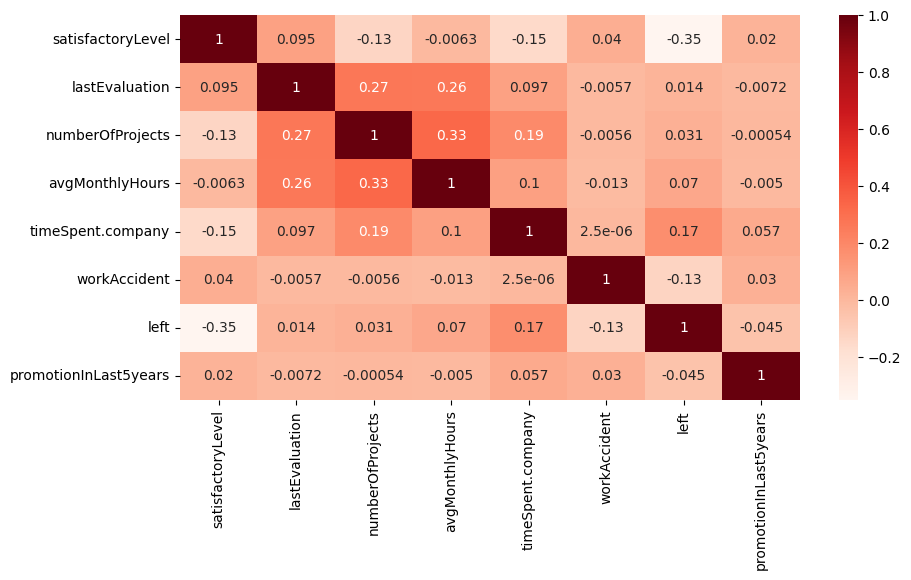

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Reds')   #cmap sets columns
plt.show()

From above heatmap, we are unable to get any good correlation between 'left' and any other column.

Therefore we would proceed for further visualization for the inferences

##Drawing inferences from data

In [21]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

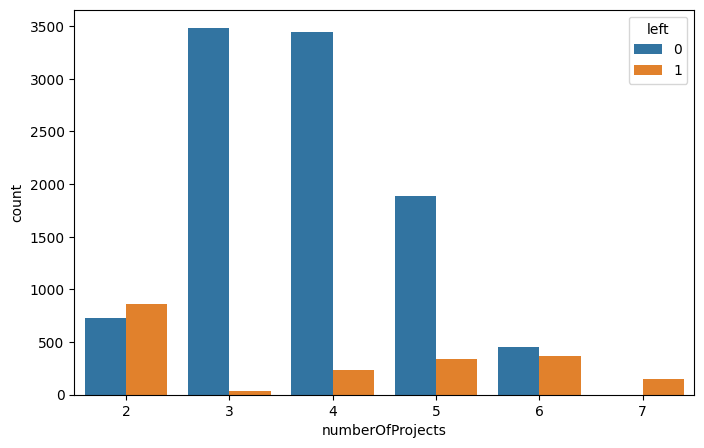

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='numberOfProjects',hue='left')
plt.show()

**Inference from Number Of Projects**:
From above graph we can observe that employees which have 2 projects are the most who are leaving.
Also all people who have 7 projects are leaving.


**Suggestion**:
The optimum number of projects that employees should be assigned with is 3 to 5 projects. This is because maximum people having those number of projects stayed. No more and no less

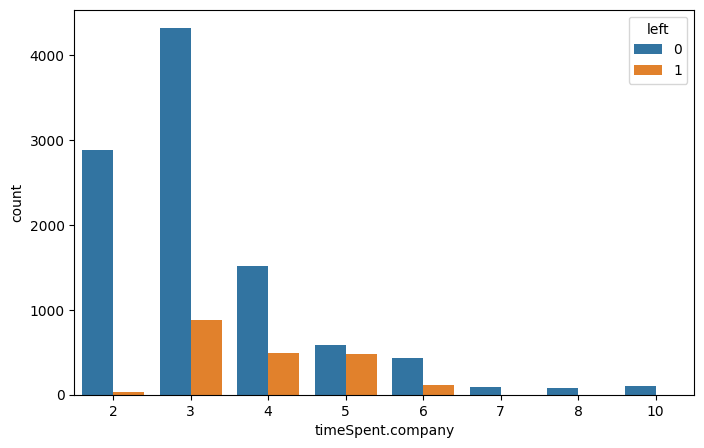

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='timeSpent.company',hue='left')
plt.show()

**Inference from Years Spent at Company:** Most people are leaving after completing 3 to 5 years. Less for 1 and 2 years as they are freshers and want to gain experience. And having 7 to 10 years of experience makes them comfortable with company

**Suggestion:** Once they complete 4 to 5 years, they can be assigned a higher post with having them to manage few juniors. Higher salary, incentives can be offered to retain employees. Beneficial policies like stocks

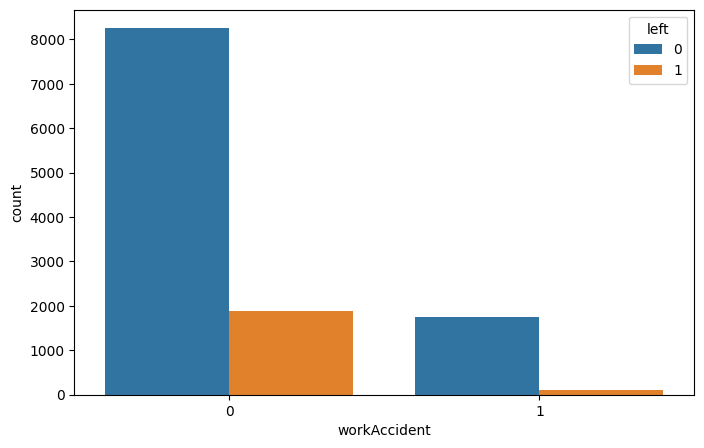

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='workAccident',hue='left')
plt.show()

Nothing much significant to infer

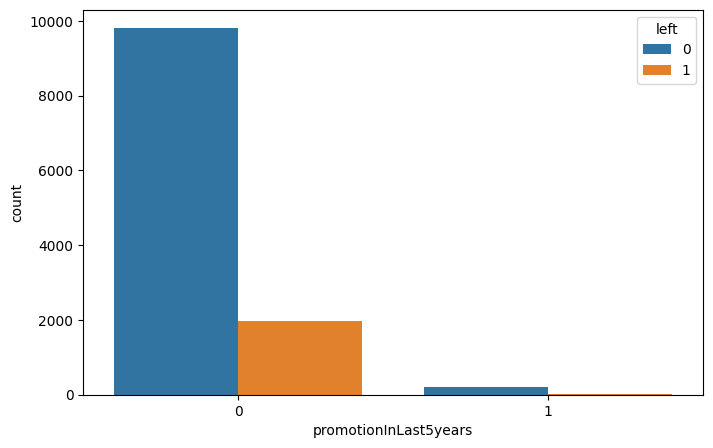

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='promotionInLast5years',hue='left')
plt.show()

**Inference from Promotion In Last 5 years:** Very few people were promoted in last 5 years. But all of those did not leave

**Suggestion:** HR should provide timely promotions

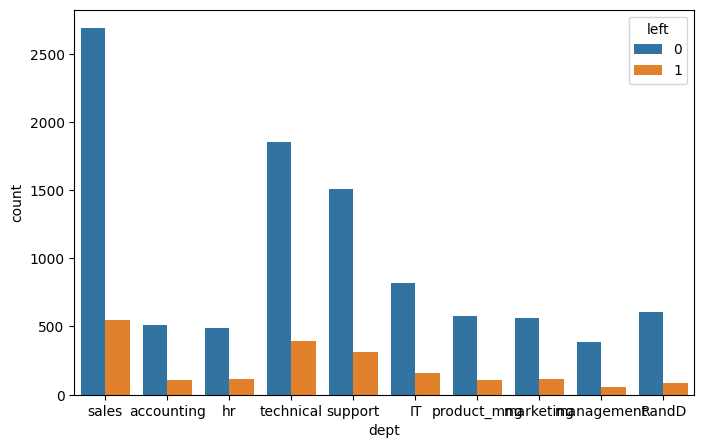

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='dept',hue='left')
plt.show()

**Inference from department:** Sales, Tech and Support team have more number of people who are leaving

**Suggestion:** Improve team building, policy. Taking feedback to improve on negative points. Offer appraisal and give chance to switch to other department

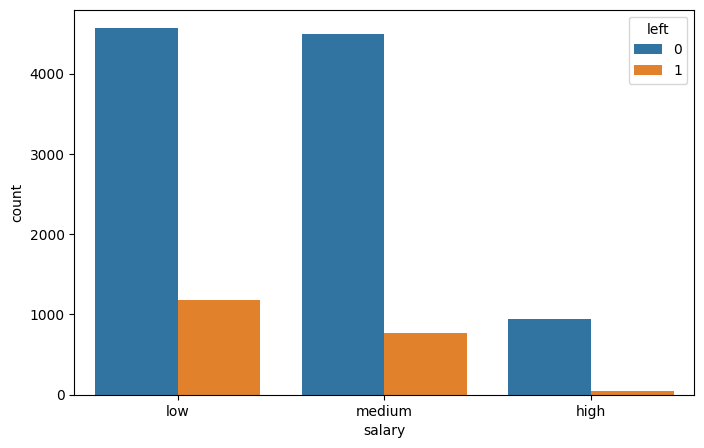

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='salary',hue='left')
plt.show()

**Inference from Salary:** People having high salary are the least ones to leave amongst the 3 categories. People with low salary are leaving

**Suggestions:** Increasing salary. Work load based on salary

##Conclusion
**Inferences:**
1. People having 2 and 7 projects are maximum ones to leave
2. Most people are leaving after completing 3 to 5 years.
3. Very few people were promoted in last 5 years
4. Sales, Tech and Support team have more number of people who are leaving
5. People with low salary are leaving and those with high salary are staying

**Suggestions:**
1. The optimum number of projects that employees should be assigned with is 3 to 5 projects.
2. Provide exciting opportunities like handling a team
3. HR should provide timely promotions
4. Gather feedback and offer chance to switch department
5. Increase salary